Execution Cost: 5.034850489881723
Slippage: 0.0


/var/folders/67/6910_dpd2q920c45xh71ypbc0000gn/T/ipykernel_89003/888175187.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start="2023-01-01 09:30", end="2023-01-01 16:00", freq="T")


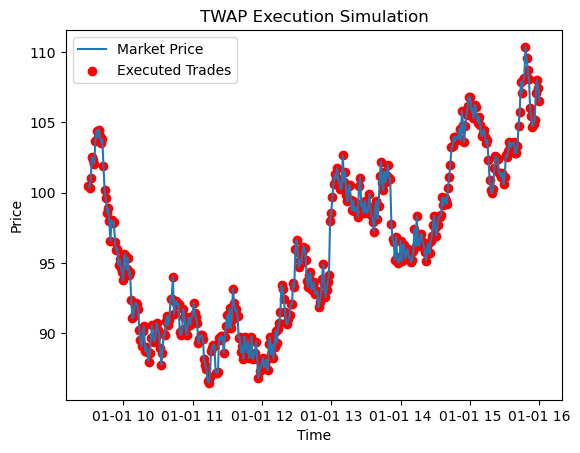

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic market data
np.random.seed(42)
timestamps = pd.date_range(start="2023-01-01 09:30", end="2023-01-01 16:00", freq="T")
prices = np.cumsum(np.random.normal(loc=0, scale=1, size=len(timestamps))) + 100
volumes = np.random.randint(100, 1000, len(timestamps))

market_data = pd.DataFrame({"Timestamp": timestamps, "Price": prices, "Volume": volumes})

# TWAP Simulation
def twap_strategy(order_size, start_time, end_time, market_data):
    twap_interval = (end_time - start_time).seconds // len(market_data)
    trades = []
    order_split = order_size / len(market_data)
    
    for i, row in market_data.iterrows():
        trades.append({"Time": row["Timestamp"], "Executed Price": row["Price"], "Executed Volume": order_split})
    
    return pd.DataFrame(trades)

# Parameters
order_size = 1000  # Total order size
start_time = pd.Timestamp("2023-01-01 09:30")
end_time = pd.Timestamp("2023-01-01 16:00")

# Execute strategy
executed_trades = twap_strategy(order_size, start_time, end_time, market_data)

# Metrics calculation
benchmark_price = market_data["Price"].mean()
execution_cost = ((executed_trades["Executed Price"] - benchmark_price).abs()).mean()
slippage = ((executed_trades["Executed Price"] - market_data["Price"]).abs()).mean()

# Results
print("Execution Cost:", execution_cost)
print("Slippage:", slippage)

# Visualization
plt.plot(market_data["Timestamp"], market_data["Price"], label="Market Price")
plt.scatter(executed_trades["Time"], executed_trades["Executed Price"], color="red", label="Executed Trades")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.title("TWAP Execution Simulation")
plt.show()

###
BONUS

Dynamic VWAP Implementation

Key Features
1.	Allocate trades proportionally to real-time volume distribution.
2.	Adjust execution dynamically based on updated volume data.
3.	Use synthetic market data for simulation.

Benchmark VWAP Price: 96.16479719604209
Execution Cost: 5.031814355816155
Slippage: 0.0


/var/folders/67/6910_dpd2q920c45xh71ypbc0000gn/T/ipykernel_89003/1304317536.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  timestamps = pd.date_range(start="2023-01-01 09:30", end="2023-01-01 16:00", freq="T")


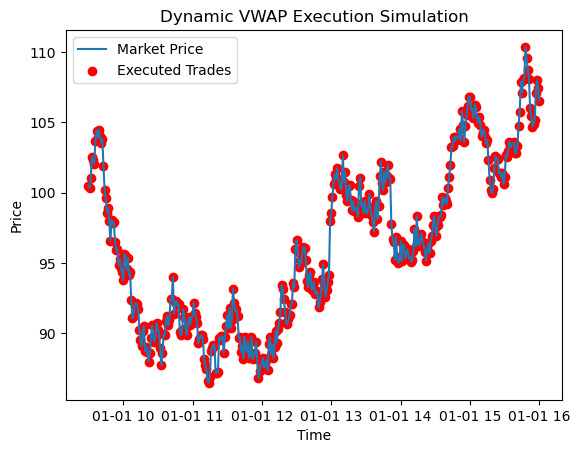

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic market data
np.random.seed(42)
timestamps = pd.date_range(start="2023-01-01 09:30", end="2023-01-01 16:00", freq="T")
prices = np.cumsum(np.random.normal(loc=0, scale=1, size=len(timestamps))) + 100
volumes = np.random.randint(100, 1000, len(timestamps))

market_data = pd.DataFrame({"Timestamp": timestamps, "Price": prices, "Volume": volumes})

# Dynamic VWAP Simulation
def dynamic_vwap_strategy(order_size, market_data):
    total_volume = market_data["Volume"].sum()
    executed_trades = []

    # Dynamically allocate trades based on real-time volume distribution
    for _, row in market_data.iterrows():
        volume_weight = row["Volume"] / total_volume
        executed_volume = volume_weight * order_size
        executed_trades.append({"Time": row["Timestamp"], "Executed Price": row["Price"], "Executed Volume": executed_volume})

    return pd.DataFrame(executed_trades)

# Parameters
order_size = 1000  # Total order size

# Execute strategy
executed_trades = dynamic_vwap_strategy(order_size, market_data)

# Metrics calculation
benchmark_price = (market_data["Price"] * market_data["Volume"]).sum() / market_data["Volume"].sum()  # VWAP
execution_cost = ((executed_trades["Executed Price"] - benchmark_price).abs()).mean()
slippage = ((executed_trades["Executed Price"] - market_data["Price"]).abs()).mean()

# Results
print("Benchmark VWAP Price:", benchmark_price)
print("Execution Cost:", execution_cost)
print("Slippage:", slippage)

# Visualization
plt.plot(market_data["Timestamp"], market_data["Price"], label="Market Price")
plt.scatter(executed_trades["Time"], executed_trades["Executed Price"], color="red", label="Executed Trades")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.title("Dynamic VWAP Execution Simulation")
plt.show()